In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("creditcard.csv")
print("The shape of the dataset is:",df.shape)
df.head()

The shape of the dataset is: (111269, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111269 entries, 0 to 111268
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    111269 non-null  int64  
 1   V1      111269 non-null  float64
 2   V2      111269 non-null  float64
 3   V3      111269 non-null  float64
 4   V4      111269 non-null  float64
 5   V5      111269 non-null  float64
 6   V6      111269 non-null  float64
 7   V7      111269 non-null  float64
 8   V8      111269 non-null  float64
 9   V9      111269 non-null  float64
 10  V10     111269 non-null  float64
 11  V11     111269 non-null  float64
 12  V12     111269 non-null  float64
 13  V13     111269 non-null  float64
 14  V14     111269 non-null  float64
 15  V15     111269 non-null  float64
 16  V16     111269 non-null  float64
 17  V17     111269 non-null  float64
 18  V18     111269 non-null  float64
 19  V19     111269 non-null  float64
 20  V20     111269 non-null  float64
 21  V21     11

In [13]:
df.dtypes.value_counts()    #int is time and class

float64    29
int64       2
Name: count, dtype: int64

In [22]:
df.duplicated().sum()

np.int64(435)

In [26]:
# view the rows with duplicates
duplicates = df[df.duplicated(keep=False)]
print(duplicates)


         Time        V1        V2        V3        V4        V5        V6  \
32         26 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33         26 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34         26 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35         26 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112        74  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...       ...       ...       ...       ...       ...       ...       ...   
109901  71593  0.997959 -0.598804  0.545158 -0.592693 -0.099130  1.625044   
110526  71861 -1.589952  1.377178  0.547816 -1.351176 -0.806371 -0.584106   
110527  71861 -1.589952  1.377178  0.547816 -1.351176 -0.806371 -0.584106   
110528  71861 -1.553554  1.434506  0.522362 -1.365261 -0.935809 -0.496091   
110529  71861 -1.553554  1.434506  0.522362 -1.365261 -0.935809 -0.496091   

              V7        V8        V9  ...       V21       V22       V23  \


In [28]:
# drop rows with duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()
print("New shape after dropping duplicates:",df.shape)

New shape after dropping duplicates: (110834, 31)


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,110834.0,45193.433874,18134.908335,0.000000,34714.000000,47051.000000,59849.000000,141541.000000
V1,110834.0,-0.249973,1.836666,-56.407510,-1.018271,-0.257661,1.155594,2.354003
V2,110834.0,-0.025891,1.637762,-72.715728,-0.594691,0.079876,0.739910,18.902453
V3,110834.0,0.682181,1.304233,-33.680984,0.176118,0.756062,1.379766,4.226108
V4,110834.0,0.153327,1.339629,-5.172595,-0.710850,0.180706,1.016022,16.715537
V5,110834.0,-0.282529,1.341982,-42.147898,-0.904614,-0.317124,0.244565,34.801666
V6,110834.0,0.094195,1.298093,-26.160506,-0.650056,-0.159515,0.486329,22.529298
V7,110834.0,-0.114160,1.195803,-31.764946,-0.603381,-0.068993,0.410841,36.677268
V8,110834.0,0.059048,1.201044,-73.216718,-0.134440,0.077019,0.367454,20.007208
V9,110834.0,-0.065434,1.100210,-9.283925,-0.701824,-0.129837,0.527146,10.392889


In [38]:
fraud = df[df["Class"]==1]
valid = df[df["Class"]==0]
print("Fraud:",len(fraud))
print("Valid:",len(valid))

outlierPercentage = (len(fraud)/len(valid))*100
print("Outlier Percentage:",outlierPercentage)

Fraud: 234
Valid: 110600
Outlier Percentage: 0.2115732368896926


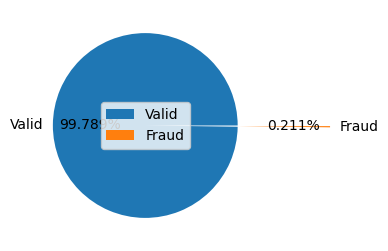

In [44]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(3,3))

ax.pie(
    df["Class"].value_counts(),  
    labels=['Valid', 'Fraud'],   
    autopct="%1.3f%%",           # 3 decimal points
    explode = [0, 1]             # separate fraud slice
)
plt.legend()
plt.show()


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

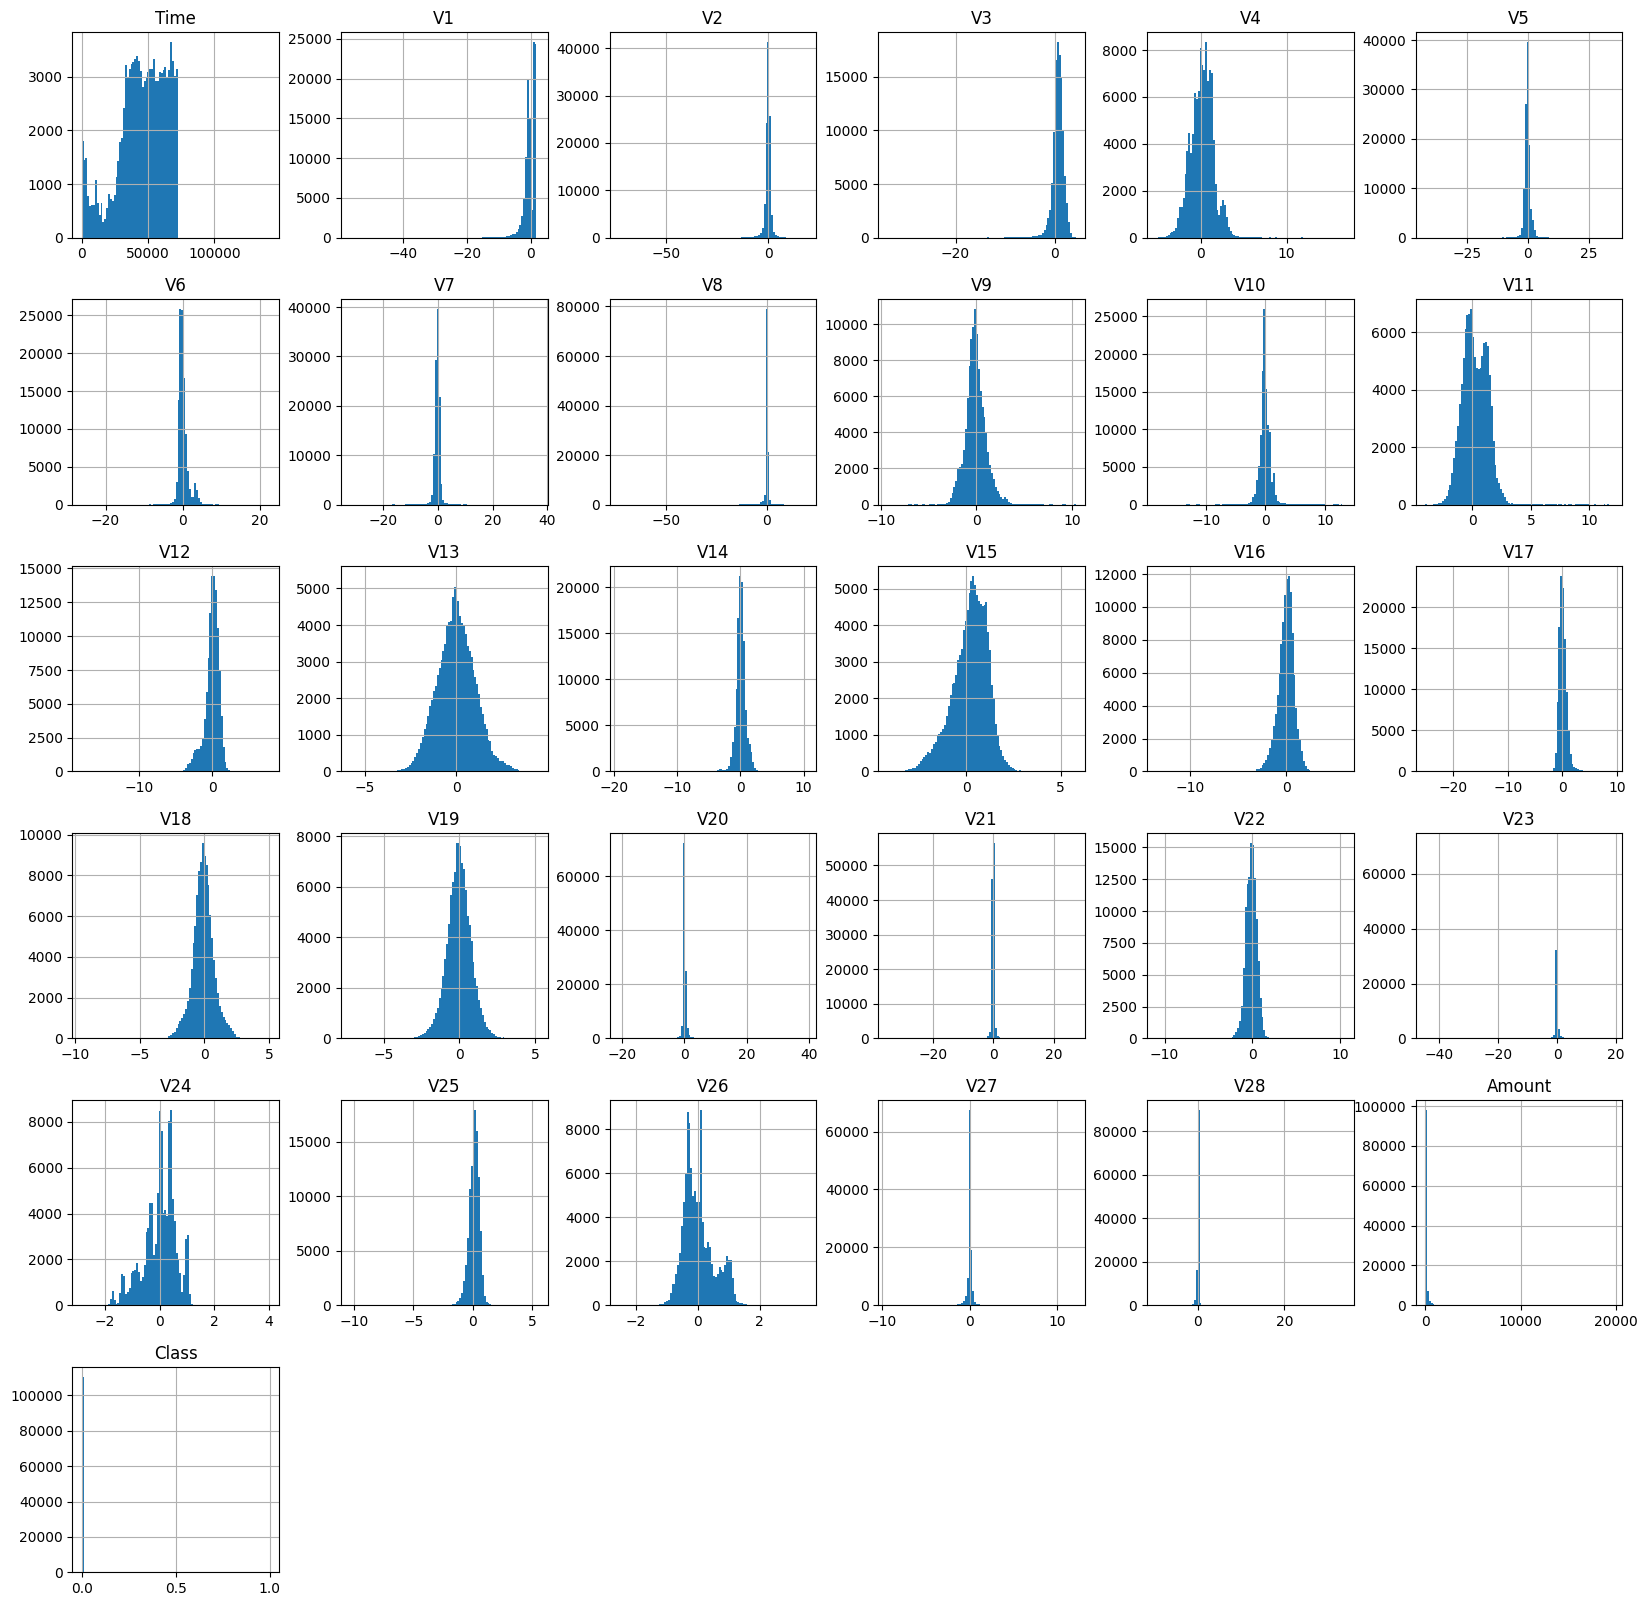

In [49]:
df.hist(bins=100, figsize=(20,20))

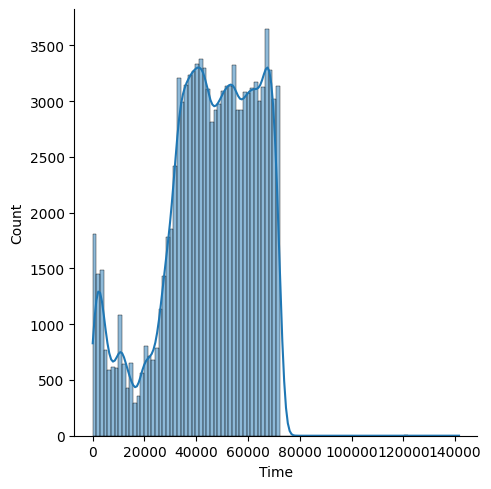

In [57]:
sns.displot(df['Time'], kde=True, bins=100)
# time is not scaled

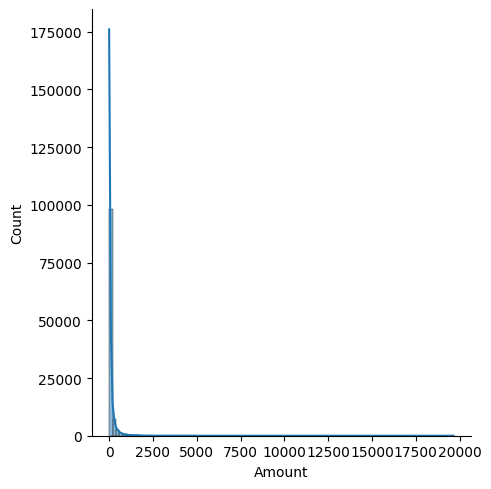

In [58]:
sns.displot(df['Amount'], kde=True, bins=100)
# amount is skewed to the right

In [62]:
from sklearn.model_selection import train_test_split

X = df.drop(["Class"], axis=1)
y = df["Class"]

print(X.shape,y.shape)

X_train, X_temp, y_train, y_temp = train_test_split(
    X,y,test_size=0.4, stratify=y, random_state=42)

X_val,X_test,y_val,y_test = train_test_split(
    X_temp,y_temp, test_size=0.2, stratify=y_temp, random_state=42)

# stratify=y ensures the same proportion of y in both splits, train and temp

(110834, 30) (110834,)


In [66]:
print(y_train.value_counts)
print(y_temp.value_counts)
print(y_test.value_counts)

<bound method IndexOpsMixin.value_counts of 33764     0
99508     0
48238     0
82422     0
81370     0
         ..
107000    0
98249     0
109644    0
59476     0
91785     0
Name: Class, Length: 66500, dtype: int64>
<bound method IndexOpsMixin.value_counts of 20248     0
99693     0
33208     0
38244     0
7529      0
         ..
2414      0
108673    0
43017     0
104765    0
10307     0
Name: Class, Length: 44334, dtype: int64>
<bound method IndexOpsMixin.value_counts of 22756     0
65206     0
60017     0
30625     0
95043     0
         ..
99786     0
50233     0
16845     0
108049    0
32456     0
Name: Class, Length: 8867, dtype: int64>
